# Heart Disease Prediction

## import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("heart.csv")

In [31]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseA0gi0a,Oldpeak,ST_Slope,HeartDisease
0,40,1,0,140,289,0,172,0,0.0,0,0
1,49,0,1,160,180,0,156,0,1.0,1,1
2,37,1,0,130,283,0,98,0,0.0,0,0
3,48,0,2,138,214,0,108,1,1.5,1,1
4,54,1,1,150,195,0,122,0,0.0,0,0


## preprocessing

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseA0gi0a  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 86.2+ KB
None


In [5]:
# Mapping dictionaries
chest_pain_mapping = {'ATA': 0, 'NAP': 1, 'ASY': 2, 'TA': 3}
resting_ecg_mapping = {'Normal': 0, 'ST': 1, 'LVH': 2}
st_slope_mapping = {'Up': 0, 'Flat': 1, 'Down': 2}

# Apply mappings
data['ChestPainType'] = data['ChestPainType'].map(chest_pain_mapping)
data['RestingECG'] = data['RestingECG'].map(resting_ecg_mapping)
data['ST_Slope'] = data['ST_Slope'].map(st_slope_mapping)

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseA0gi0a  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB
None


In [7]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseA0gi0a,Oldpeak,ST_Slope,HeartDisease
0,40,1,0,140,289,0,0,172,0,0.0,0,0
1,49,0,1,160,180,0,0,156,0,1.0,1,1
2,37,1,0,130,283,0,1,98,0,0.0,0,0
3,48,0,2,138,214,0,0,108,1,1.5,1,1
4,54,1,1,150,195,0,0,122,0,0.0,0,0


## visualization

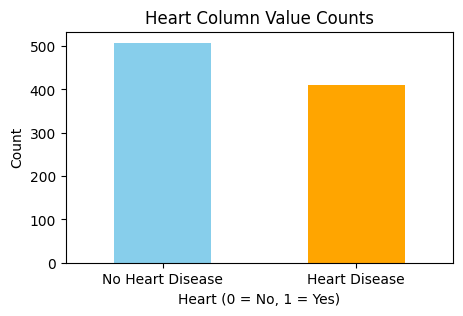

In [8]:
cardio_counts = data['HeartDisease'].value_counts()

plt.figure(figsize=(5, 3))
cardio_counts.plot(kind='bar', color=['skyblue', 'orange'], rot=0)
plt.title('Heart Column Value Counts')
plt.xlabel('Heart (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Heart Disease', 'Heart Disease'], rotation=0)
plt.show()

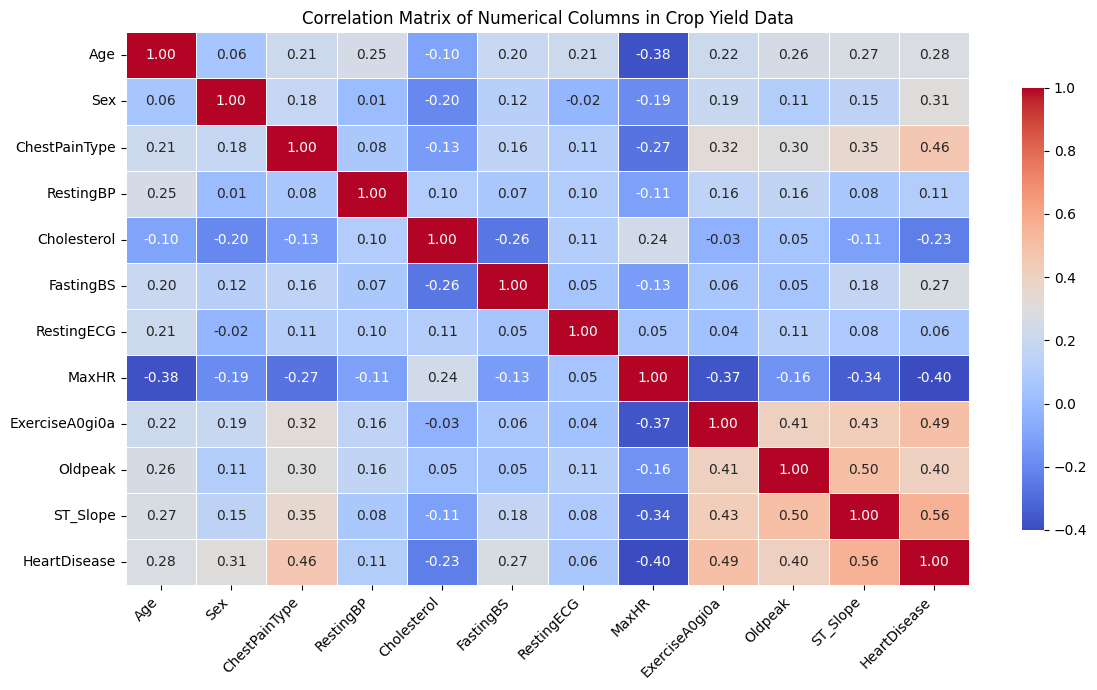

In [9]:
corr_matrix = data.corr()

plt.figure(figsize=(12, 7)) 
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, 
            cbar_kws={'shrink': 0.8})
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Correlation Matrix of Numerical Columns in Crop Yield Data")
plt.tight_layout()
plt.show()

In [10]:
data = data.drop('RestingECG', axis=1)

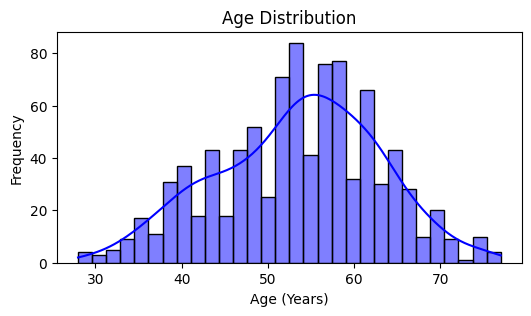

In [11]:
plt.figure(figsize=(6, 3))
sns.histplot(data['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.show()

In [12]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseA0gi0a,Oldpeak,ST_Slope,HeartDisease
0,40,1,0,140,289,0,172,0,0.0,0,0
1,49,0,1,160,180,0,156,0,1.0,1,1
2,37,1,0,130,283,0,98,0,0.0,0,0
3,48,0,2,138,214,0,108,1,1.5,1,1
4,54,1,1,150,195,0,122,0,0.0,0,0


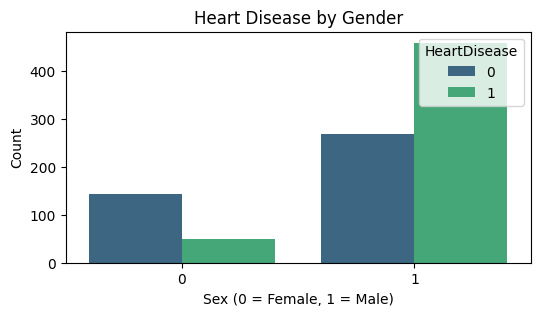

In [32]:
plt.figure(figsize=(6, 3))
sns.countplot(x='Sex', hue='HeartDisease', data=data, palette='viridis')
plt.title('Heart Disease by Gender')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(title='HeartDisease', loc='upper right')
plt.show()

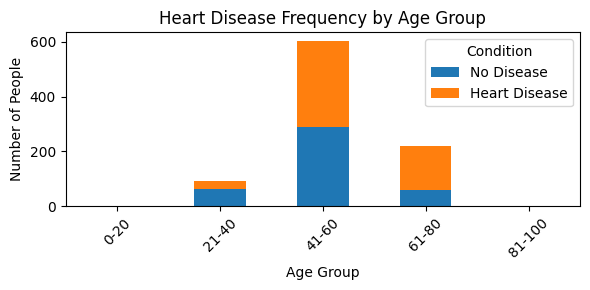

In [14]:
# Create Age Groups with 0 to 100 range
age_group_data = data.copy()
age_group_data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])
age_group_counts = age_group_data.groupby('AgeGroup')['HeartDisease'].value_counts().unstack().fillna(0)
age_group_counts.columns = ['No Disease', 'Heart Disease']

age_group_counts.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], figsize=(6, 3))

plt.title('Heart Disease Frequency by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.legend(title='Condition')
plt.tight_layout()
plt.show()

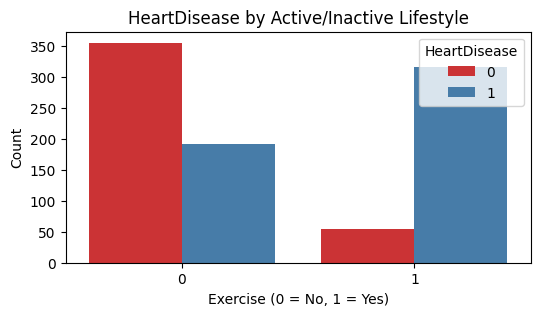

In [15]:
plt.figure(figsize=(6, 3))
sns.countplot(x='ExerciseA0gi0a', hue='HeartDisease', data=data, palette='Set1')
plt.title('HeartDisease by Active/Inactive Lifestyle')
plt.xlabel('Exercise (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='HeartDisease', loc='upper right')
plt.show()

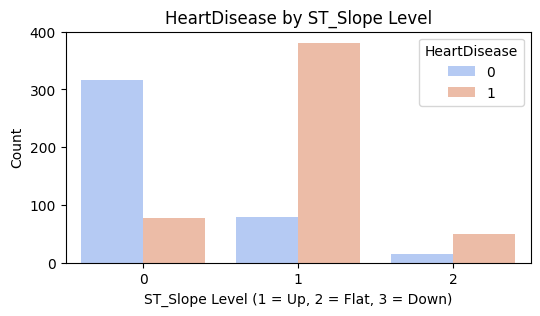

In [16]:
plt.figure(figsize=(6, 3))
sns.countplot(x='ST_Slope', hue='HeartDisease', data=data, palette='coolwarm')
plt.title('HeartDisease by ST_Slope Level')
plt.xlabel('ST_Slope Level (1 = Up, 2 = Flat, 3 = Down)')
plt.ylabel('Count')
plt.legend(title='HeartDisease', loc='upper right')
plt.show()

## data split

In [17]:
X = data.drop(['HeartDisease'], axis=1)
y = data['HeartDisease']

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## machine learning

## random forest

In [20]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Predict using the classifier
y_pred = rf.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate Precision, Recall, and F1 Score
precision = precision_score(y_test, y_pred, average='binary') 
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Print Results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{cm}")

Accuracy: 0.8804347826086957
Precision: 0.9047619047619048
Recall: 0.8878504672897196
F1 Score: 0.8962264150943396
Confusion Matrix:
[[67 10]
 [12 95]]


## logistic

In [22]:
from sklearn.linear_model import LogisticRegression

# Initialize and train Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Predict using the classifier
y_pred = lr.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate Precision, Recall, and F1 Score
precision = precision_score(y_test, y_pred, average='binary') 
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Print Results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{cm}")

Accuracy: 0.8369565217391305
Precision: 0.8811881188118812
Recall: 0.8317757009345794
F1 Score: 0.8557692307692307
Confusion Matrix:
[[65 12]
 [18 89]]


## xgb

In [24]:
from xgboost import XGBClassifier

# Initialize and train XGBoost
xgb = XGBClassifier(n_estimators=200, random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Predict using the classifier
y_pred = xgb.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate Precision, Recall, and F1 Score
precision = precision_score(y_test, y_pred, average='binary') 
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Print Results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{cm}")

Accuracy: 0.8641304347826086
Precision: 0.91
Recall: 0.8504672897196262
F1 Score: 0.8792270531400966
Confusion Matrix:
[[68  9]
 [16 91]]


## deep learning

## CNN

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import numpy as np

# Reshape data for Conv1D: (samples, features, 1)
X_train_reshaped = np.expand_dims(X_train, axis=-1)
X_test_reshaped = np.expand_dims(X_test, axis=-1)

# Define the CNN model
model = Sequential()

# First Convolutional Layer
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

# Second Convolutional Layer
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

# Flatten and Fully Connected Layer
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Learning rate reduction callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.0001, verbose=1)

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=200, batch_size=16, validation_data=(X_test_reshaped, y_test), callbacks=[reduce_lr])

Epoch 1/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6454 - loss: 0.6535 - val_accuracy: 0.7663 - val_loss: 0.5359 - learning_rate: 0.0010
Epoch 2/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7520 - loss: 0.5507 - val_accuracy: 0.7609 - val_loss: 0.4865 - learning_rate: 0.0010
Epoch 3/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7645 - loss: 0.4988 - val_accuracy: 0.7717 - val_loss: 0.4849 - learning_rate: 0.0010
Epoch 4/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7728 - loss: 0.5222 - val_accuracy: 0.7880 - val_loss: 0.4592 - learning_rate: 0.0010
Epoch 5/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7828 - loss: 0.4675 - val_accuracy: 0.7935 - val_loss: 0.4560 - learning_rate: 0.0010
Epoch 6/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7940 - loss: 0.4655 - val_accuracy: 0.7500 - val_loss: 0.5212 - learning_rate: 0.0010
Epoch 7/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7471 - loss: 0.5007 - val_ac

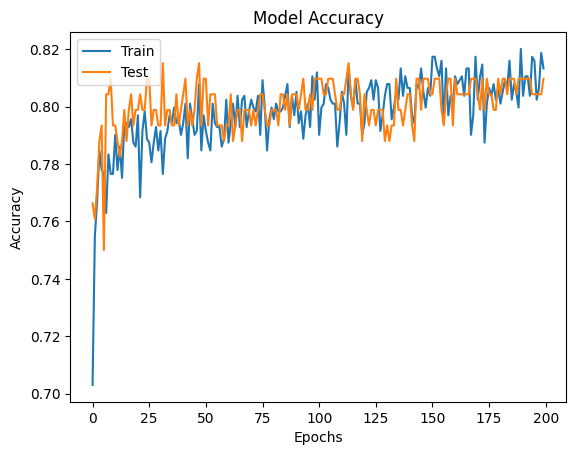

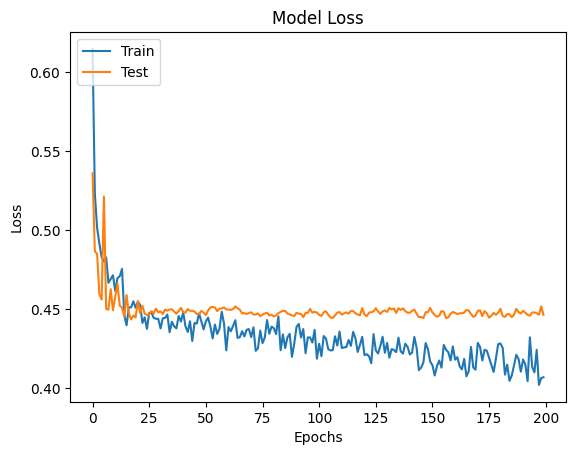

In [27]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test_reshaped)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary labels

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Accuracy: 0.8097826086956522
Precision: 0.8103448275862069
Recall: 0.8785046728971962
F1 Score: 0.8430493273542601
Confusion Matrix:
[[55 22]
 [13 94]]


In [29]:
import joblib

joblib.dump(rf, "best_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("Model and scaler saved.")

Model and scaler saved.
